# K Means Customers
- minimize WCSS to determine number of clusers
- https://stats.stackexchange.com/questions/158210/k-means-why-minimizing-wcss-is-maximizing-distance-between-clusters
- the optimal number of clusters can be found with the "elbow method"
- https://pythonprogramminglanguage.com/kmeans-elbow-method/
- KMeans https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

### Get the dataset

In [9]:
df = pd.read_csv("Mall_Customers.csv")
print("number of records: ", len(df))
df.head()

number of records:  200


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


- group the clients based on their annual income and spending score

In [10]:
X = df.iloc[:, [3,4]].values

### Use elbow method to find optimal number of clusters

In [20]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=31)
    km.fit(X)
    wcss.append(km.inertia_)

- visualize the elbow

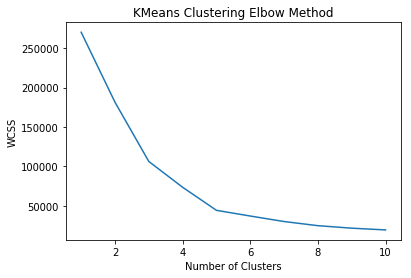

In [21]:
plt.plot(range(1,11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("KMeans Clustering Elbow Method")
plt.show()

### Cluster the dataset with 5 clusters

In [24]:
km = KMeans(n_clusters=5, init='k-means++', random_state=31)
y_kmeans = km.fit_predict(X)

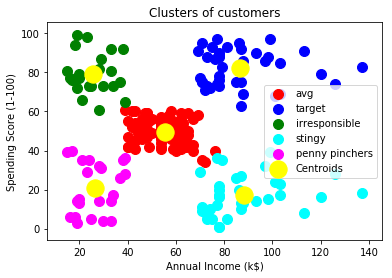

In [37]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'avg')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'target')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'irresponsible')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'stingy')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'penny pinchers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [32]:
print(df[y_kmeans==3])

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
124         125  Female   23                  70                      29
128         129    Male   59                  71                      11
130         131    Male   47                  71                       9
134         135    Male   20                  73                       5
136         137  Female   44                  73                       7
138         139    Male   19                  74                      10
140         141  Female   57                  75                       5
144         145    Male   25                  77                      12
146         147    Male   48                  77                      36
148         149  Female   34                  78                      22
150         151    Male   43                  78                      17
152         153  Female   44                  78                      20
154         155  Female   47                  78   